# Analysis 2 : Individual performance

In [1]:
import pandas as pd
import numpy as np
import json
from collections import Counter
import operator
from ast import literal_eval
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%pylab inline
import httplib

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
data = pd.read_csv('./data/2002-2012-EPL.csv')

In [3]:
with open('./data/season_table.json') as json_file:
    season_table = json.load(json_file)

In [4]:
with open('./data/team_W_L_D_dict.json') as json_file:
    team_W_L_D_dict = json.load(json_file)

In [5]:
with open('./data/points.json') as json_file:
    points = json.load(json_file)

In [34]:
def get_team_stats(team = 'Manchester United',save = True):
    
    stats =  pd.DataFrame(columns = ['season','ranking','points','W','D','L','average number of goals/game'], 
                              index = np.arange(0,len(data.season.unique()),1))

    c = 0
    for i in sorted(season_table.keys()):
        stats.season[c] = i
        for j in range(20):
            if season_table[i][j].keys()[0]==team:
                rank = 20-j
            else:
                continue
        stats.ranking[c] = rank
        stats.points[c] = points[i][team]['pt']

        temp1 = data[data.season == i]
        temp2 = temp1[temp1.home_team == team]
        temp3 = temp1[temp1.away_team == team]

        games = float(len(temp2) + len(temp2))
        goals = float(temp2.home_score.sum() +  temp3.away_score.sum())


        stats['average number of goals/game'][c] = (goals/games)
        stats.W[c] = team_W_L_D_dict[i][team]['W']
        stats.D[c] = team_W_L_D_dict[i][team]['D']
        stats.L[c] = team_W_L_D_dict[i][team]['L']

        c+=1
        
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(1, 1, 1)

    plt.plot(stats.index,stats['average number of goals/game'],color='turquoise', linestyle='-', marker='o',
             label = 'average number of goals/game')

    avg = stats['average number of goals/game'].mean()

    plt.plot([0,len(stats.index)-1],[avg,avg],color='orange', linestyle='dashed', label = 'average over all seasons')


    plt.xticks(range(len(stats)),stats.season,rotation=45,ha='right')

    ax.set_title('Average Number of Goals/game in each Season',fontsize='xx-large')
    ax.set_ylabel('average number of goals/game',fontsize='x-large')
    ax.legend(loc='best',fontsize = 'x-large')
    
    if save:
        savefig('Average Number of Goals-game in each Season - '+ team +'.png')
    
    
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(1, 1, 1)

    plt.plot(stats.index,stats.ranking,color='turquoise', linestyle='-', marker='o',label = 'ranking')
    avg = stats.ranking.mean()

    plt.plot([0,len(stats.index)-1],[avg,avg],color='orange', linestyle='dashed',label = 'average ranking')


    plt.xticks(range(len(stats)),stats.season,rotation=45,ha='right')

    ax.set_title('Ranking in each Season - ' + team ,fontsize='xx-large')
    ax.set_ylabel('ranking',fontsize='xx-large')
    ax.set_ylim([0,4])
    ax.legend(loc='best',fontsize='x-large')

    if save:
        savefig('Ranking in each Season  - '+ team +'.png')
    
    return stats

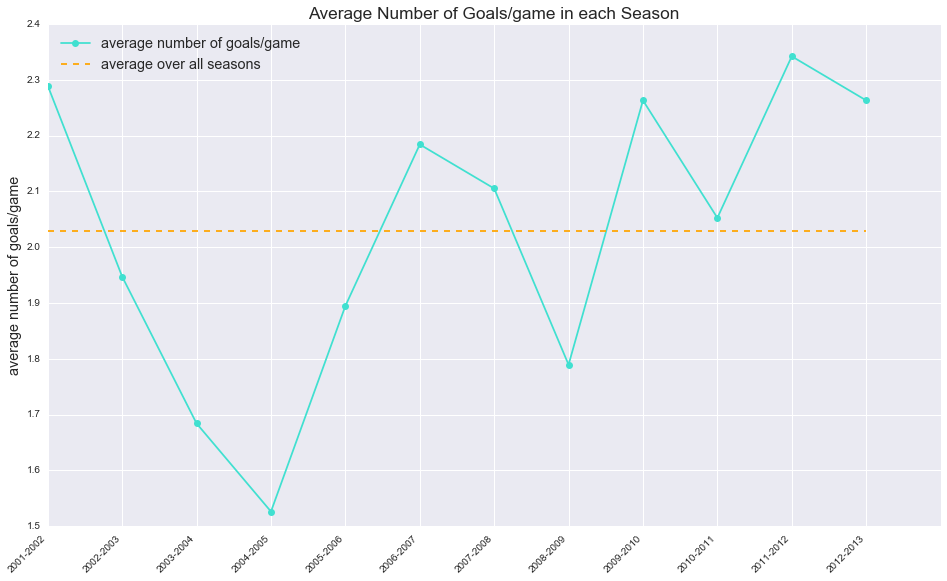

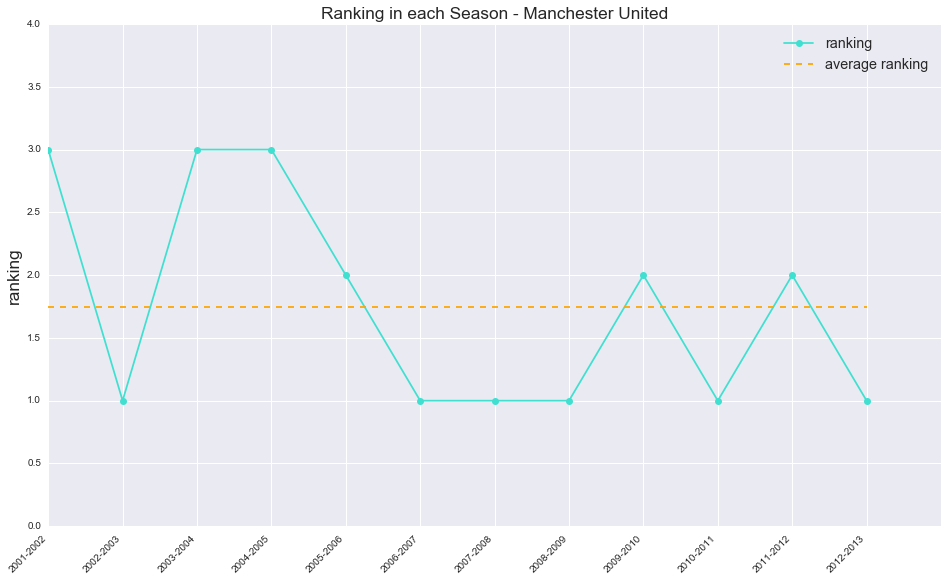

In [36]:
man_utd_stat = get_team_stats('Manchester United',save = True)